![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) after `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [9]:
# Import necessary libraries
library(tidyverse)

New names:
• `` -> `...1`
Rows: 4884 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): home_team, away_team, tournament
dbl  (3): ...1, home_score, away_score
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 44353 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): home_team, away_team, tournament
dbl  (3): ...1, home_score, away_score
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


      p_val       decision
1 0.9949012 fail to reject


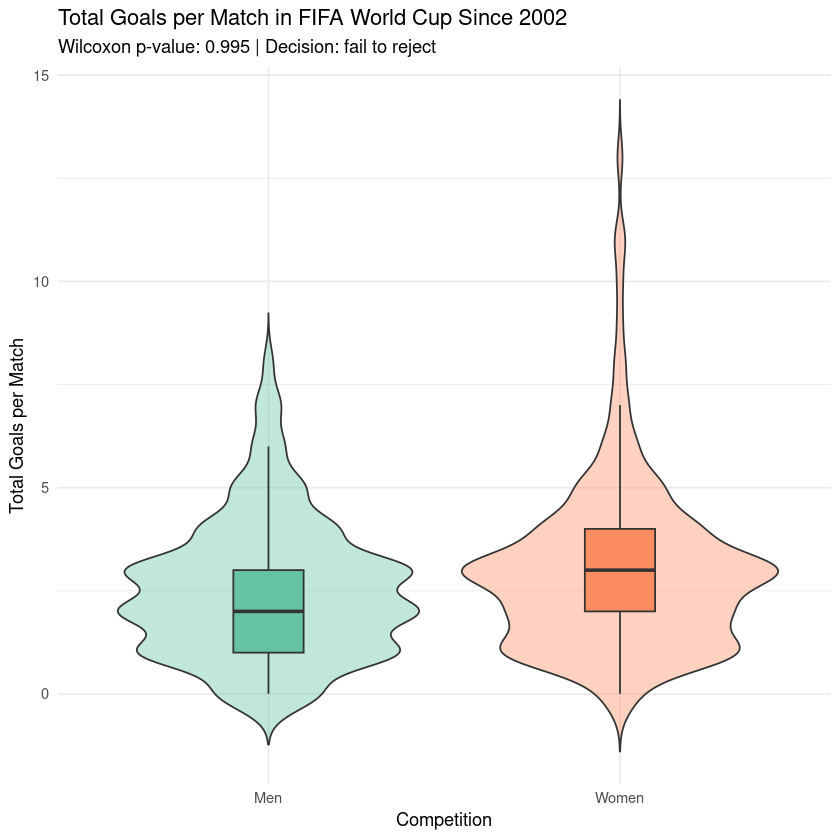

In [10]:
# Load necessary libraries
library(tidyverse)

# Load the datasets
women_results <- read_csv("women_results.csv")
men_results <- read_csv("men_results.csv")

# Filter for World Cup matches since 2002
women_wc <- women_results %>%
  filter(date >= "2002-01-01", tournament == "FIFA World Cup")

men_wc <- men_results %>%
  filter(date >= "2002-01-01", tournament == "FIFA World Cup")

# Calculate total goals per match and add label for gender
women_goals_df <- women_wc %>%
  mutate(total_goals = home_score + away_score,
         group = "Women") %>%
  select(total_goals, group)

men_goals_df <- men_wc %>%
  mutate(total_goals = home_score + away_score,
         group = "Men") %>%
  select(total_goals, group)

# Combine into one dataframe for visualization and testing
combined_goals <- bind_rows(women_goals_df, men_goals_df)

# Wilcoxon rank-sum test
wilcox_result <- wilcox.test(
  total_goals ~ group,
  data = combined_goals,
  alternative = "greater"
)

# Extract p-value and decision
p_val <- wilcox_result$p.value
decision <- ifelse(p_val < 0.10, "reject", "fail to reject")

# Create result data frame
result_df <- data.frame(
  p_val = p_val,
  decision = decision
)

# Print test result
print(result_df)

# Create ggplot visualization
ggplot(combined_goals, aes(x = group, y = total_goals, fill = group)) +
  geom_violin(trim = FALSE, alpha = 0.4) +
  geom_boxplot(width = 0.2, outlier.shape = NA) +
  labs(
    title = "Total Goals per Match in FIFA World Cup Since 2002",
    subtitle = paste("Wilcoxon p-value:", signif(p_val, 3), "| Decision:", decision),
    x = "Competition",
    y = "Total Goals per Match"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2") +
  theme(legend.position = "none")

